In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('vg_edited.csv', header=None)
cols = ['painting']
for i in range(12):
    cols.append('c'+str(i))
df.columns = cols
def combine(row):
    return np.array([row[0], row[1], row[2]])

df['color0'] = df[['c0','c1','c2']].apply(combine,axis=1)
df['color1'] = df[['c3', 'c4', 'c5']].apply(combine,axis=1)
df['color2'] = df[['c6', 'c7', 'c8']].apply(combine,axis=1)
df['color3'] = df[['c9', 'c10', 'c11']].apply(combine,axis=1)
cols.remove('painting')
df = df.drop(cols,axis=1)

In [7]:
def sort_color(row):
    tmp_arr = np.array([row[1], row[2], row[3], row[4]])
    tmp_arr = tmp_arr[tmp_arr[:,0].argsort()]
    return tmp_arr

In [8]:
df['sorted'] = df.apply(sort_color, axis=1)

In [9]:
def color0(row):
    return row[5][0]
def color1(row):
    return row[5][1]
def color2(row):
    return row[5][2]
def color3(row):
    return row[5][3]

df['color0'] = df.apply(color0,axis=1)
df['color1'] = df.apply(color1,axis=1)
df['color2'] = df.apply(color2,axis=1)
df['color3'] = df.apply(color3,axis=1)

In [10]:
df = df.drop(['sorted'],axis=1)

In [11]:
def cal_dist_helper(i,j,df):
    dists = np.zeros(4)
    for c in range(4):
        dists[c] = np.sum(np.square(df.iloc[i]['color'+str(c)] - df.iloc[j]['color'+str(c)]))
    return dists.mean() # treat all colors with the same weight

def cal_dist(df):
    '''
    Given 2 rows, and a dataset, return the minimum distance btw these colors, with all possible pairs, assume the number of colors is fixed for now
    '''
    num = df.shape[0]
    dist_mat = np.zeros((num, num)) # i & j represents each painting 
    
    for i in range(df.shape[0]):
        for j in range(df.shape[0]):
            dist_mat[i][j] = cal_dist_helper(i,j,df)
    return dist_mat

In [12]:
dist_mat = cal_dist(df)
for i in range(df.shape[0]):
    dist_mat[i][i] = np.inf
argmax = np.argmin(dist_mat,axis=1)
df['best_match'] = argmax

In [13]:
sorted_match = np.argsort(dist_mat)

In [14]:
second_match = np.zeros(argmax.shape)
third_match = np.zeros(argmax.shape)
fourth_match = np.zeros(argmax.shape)
fifth_match = np.zeros(argmax.shape)
for i in range(argmax.shape[0]):
    second_match[i] = sorted_match[i][1]
    third_match[i] = sorted_match[i][2]
    fourth_match[i] = sorted_match[i][3]
    fifth_match[i] = sorted_match[i][4]

In [37]:
df['second_match'] = second_match.astype(int)
df['third_match'] = third_match.astype(int)
df['fourth_match'] = fourth_match.astype(int)
df['fifth_match'] = fifth_match.astype(int)

In [38]:
df

,painting,color0,color1,color2,color3,best_match,second_match,third_match,fourth_match,fifth_match
0,AMICO_CHICAGO_1031150893,"[-0.060690014, -0.021744334, 0.7657003859999999]","[0.045992389, 0.039208259, 0.13613139800000001]","[0.066482851, 0.08054073, 0.27772503]","[0.072121017, 0.10115527199999999, 0.421806747...",25,4,18,16,31
1,LESSING_ART_1039902135,"[-0.37250110299999994, -0.106825424, 0.799885295]","[0.238567892, 0.268742128, 0.85419616]","[0.422613831, 0.26191809899999996, 0.614354204]","[0.469247731, 0.400988024, 0.8271263940000001]",19,33,27,7,14
2,vincent-van-gogh_paul-gauguin-s-armchair-1888,"[-0.02467913, 0.156229275, 0.34177732899999996]","[0.116521856, 0.11507188199999999, 0.292870601]","[0.22813618600000002, 0.20285286, 0.5452695120...","[0.230888055, 0.052488862000000004, 0.351937062]",31,20,4,24,30
3,ANGAIG_10313951762,"[-0.25634381300000003, -0.05709267, 0.45578070...","[-0.198324102, -0.073553482, 0.368494724]","[0.088002185, 0.229951214, 0.68735552]","[0.23474776100000003, 0.265511713, 0.541275817]",10,7,16,25,26
4,SCALA_ARCHIVES_1039930562,"[-0.07773907299999999, 0.000535546, 0.581413335]","[-0.070995562, -0.005403135, 0.445116509]","[0.0967563, 0.125502664, 0.591647048]","[0.112238418, 0.06469050900000001, 0.282156893]",31,2,3,25,11
5,SCALA_ARCHIVES_10313879116,"[-0.120507722, -0.005528408, 0.510626342]","[-0.017778638, 0.037503052, 0.281068035]","[0.08794270300000001, 0.155874146, 0.652271317...","[0.5314934370000001, 0.447501855, 0.873536285]",6,28,21,7,24
6,vincent-van-gogh_red-vineyards-at-arles-1888,"[-0.083853959, 0.083478991, 0.46328777200000004]","[-0.025005769, 0.040469315, 0.207778784]","[0.137432874, 0.167594489, 0.433406082]","[0.327258188, 0.432175555, 0.8475524409999999]",5,28,25,24,29
7,AWSS35953_35953_41726487,"[-0.13779839, -0.109360355, 0.640463019]","[-0.035105252, 0.064742313, 0.515115594]","[0.165645389, 0.21794029399999998, 0.596197778]","[0.40266303299999995, 0.35711277799999996, 0.6...",33,25,10,3,28
8,vincent-van-gogh_sower-with-setting-sun-1888-3,"[-0.01048454, 0.048568470999999995, 0.347723135]","[0.023168985, 0.038637622999999996, 0.18758153...","[0.441752186, 0.42199062, 0.7885764690000001]","[0.493660938, 0.473669279, 0.7942426459999999]",13,26,5,21,6
9,ANGLIG_10313766393,"[0.16259362, 0.23760288899999998, 0.55123399]","[0.238104858, 0.256916527, 0.8132777809999999]","[0.332497378, 0.259406497, 0.569898848]","[0.339802121, 0.326445101, 0.676227083]",15,34,22,27,19


<IPython.core.display.Javascript object>


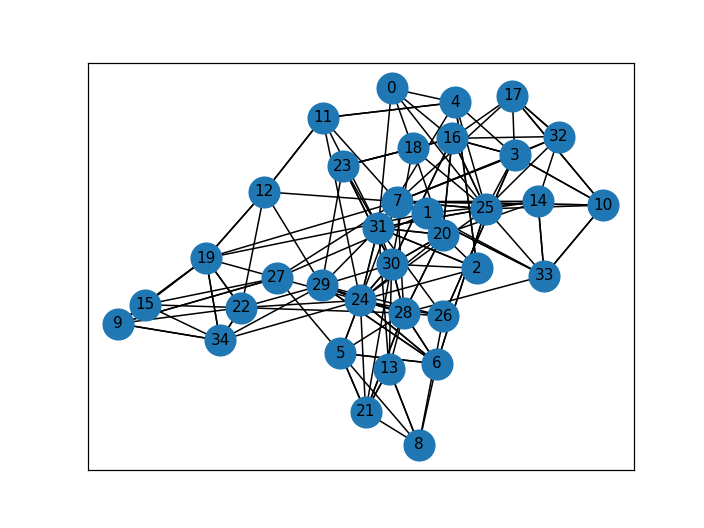

In [57]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib notebook    

Weights = {}

for i in range(df.shape[0]):
    Weights[(str(i), str(df['best_match'][i]))] = 1
    Weights[(str(i), str(df['second_match'][i]))] = 2
    Weights[(str(i), str(df['third_match'][i]))] = 3
    Weights[(str(i), str(df['fourth_match'][i]))] = 4
    Weights[(str(i), str(df['fifth_match'][i]))] = 5

G = nx.Graph()

edges = [(k[0], k[1], {'weight': v}) for k, v in Weights.items()]
G.add_edges_from(edges)

pos = nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=400)

# labels
nx.draw_networkx_labels(G,pos,font_size=10,font_family='sans-serif')

# edges
nx.draw_networkx_edges(G,pos,edgelist=edges, width=1)

# weights
# labels = nx.get_edge_attributes(G,'weight')
# nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. Evidence suggests that in most real-world networks, and in particular social networks, nodes tend to create tightly knit groups characterised by a relatively high density of ties; this likelihood tends to be greater than the average probability of a tie randomly established between two nodes (Holland and Leinhardt, 1971;[1] Watts and Strogatz, 1998[2]).

Two versions of this measure exist: the global and the local. The global version was designed to give an overall indication of the clustering in the network, whereas the local gives an indication of the embeddedness of single nodes.

In [58]:
nx.clustering(G)

{'0': 0.6,
 '25': 0.2692307692307692,
 '4': 0.4,
 '18': 0.5333333333333333,
 '16': 0.3611111111111111,
 '31': 0.30303030303030304,
 '1': 0.6,
 '19': 0.4642857142857143,
 '33': 0.5333333333333333,
 '27': 0.38095238095238093,
 '7': 0.25274725274725274,
 '14': 0.4666666666666667,
 '2': 0.7,
 '20': 0.39285714285714285,
 '24': 0.2761904761904762,
 '30': 0.41818181818181815,
 '3': 0.42857142857142855,
 '10': 0.7,
 '26': 0.3333333333333333,
 '11': 0.3,
 '5': 0.47619047619047616,
 '6': 0.4666666666666667,
 '28': 0.30303030303030304,
 '21': 0.6,
 '29': 0.37777777777777777,
 '8': 0.3,
 '13': 0.5,
 '9': 0.8,
 '15': 0.8,
 '34': 0.6,
 '22': 0.4642857142857143,
 '17': 0.7,
 '12': 0.4,
 '32': 0.6666666666666666,
 '23': 0.6}

In [64]:
centrality_dict = nx.degree_centrality(G) # 最后影响力的一个

import operator

sorted_centrality_dict = sorted(centrality_dict.items(), key=operator.itemgetter(1))
sorted_centrality_dict

[('0', 0.14705882352941177),
 ('1', 0.14705882352941177),
 ('2', 0.14705882352941177),
 ('10', 0.14705882352941177),
 ('11', 0.14705882352941177),
 ('8', 0.14705882352941177),
 ('13', 0.14705882352941177),
 ('9', 0.14705882352941177),
 ('15', 0.14705882352941177),
 ('17', 0.14705882352941177),
 ('12', 0.14705882352941177),
 ('23', 0.14705882352941177),
 ('4', 0.1764705882352941),
 ('18', 0.1764705882352941),
 ('33', 0.1764705882352941),
 ('14', 0.1764705882352941),
 ('26', 0.1764705882352941),
 ('6', 0.1764705882352941),
 ('21', 0.1764705882352941),
 ('34', 0.1764705882352941),
 ('32', 0.1764705882352941),
 ('27', 0.20588235294117646),
 ('5', 0.20588235294117646),
 ('19', 0.23529411764705882),
 ('20', 0.23529411764705882),
 ('3', 0.23529411764705882),
 ('22', 0.23529411764705882),
 ('16', 0.2647058823529412),
 ('29', 0.29411764705882354),
 ('30', 0.3235294117647059),
 ('31', 0.3529411764705882),
 ('28', 0.3529411764705882),
 ('25', 0.38235294117647056),
 ('7', 0.4117647058823529),
 ('2

24: https://library-artstor-org.revproxy.brown.edu/#/asset/LESSING_ART_1039902159 1887
7: https://library-artstor-org.revproxy.brown.edu/#/asset/AWSS35953_35953_41726487 1888
25: https://library-artstor-org.revproxy.brown.edu/#/asset/MMA_IAP_1039650832 1889
28: https://library-artstor-org.revproxy.brown.edu/#/asset/LESSING_ART_1039902158 1888
31: vincent-van-gogh_irises-1889

NOTE: All the above paintings are generally from 1887-1889/1890
Anomaly: 
a peasant woman 1885 https://library-artstor-org.revproxy.brown.edu/#/asset/AMICO_CHICAGO_1031150893;prevRouteTS=1596029774979
